In [ ]:
import base64
import requests

# OpenAI API Key
api_key = "" #attach own API key, make sure OpenAI is installed.

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "./02241014.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "I am working on a Herbarium project and need help obtaining information from images. Given the attached image, please extract all text possible in its given form, even the chinese ones, knowing that is a herbarium project. "
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

Above is the code for querying the GPT4 API with .jpg images. From interacting with the API and the chat itself, we do not think that GPT4 with vision is a valid path for identifying information from images with both chinese handwritten or typed text. The main problems arise from mislabeling  Chinese characters, even when the input image is just typed text organized well. Below is an exmaple of GPT4 with AI failing on a very basic example. The first image is the input image and the second image is the output. As you can see, it is able to identify where some of the Chinese characters are, but it mislablels a lot of the characters with characters that look somewhat similar. For example, in the information extracted, the Chinese Name, identified by, collector and habitat all contain mislabled Chinese characters. On a clean and "easier" example input of explicilty labeled and well organized Chinese data, it still is unable to translate chinese characters. With messier images and handwritten text, we found that a lot more characters were mislabeled and that some of the characters were not even included in the output, ie GPT did not even try to translate some of the labels. We will pivot to trying to label Chinese samples with Azure. We have a collection of images and their labels located at this google drive: https://drive.google.com/drive/folders/1IOzu5_ohW89_0xhsfhHIhPsDZ0m3G-QU?usp=sharing 

We may still use GPT to process the extracted labels from azure.

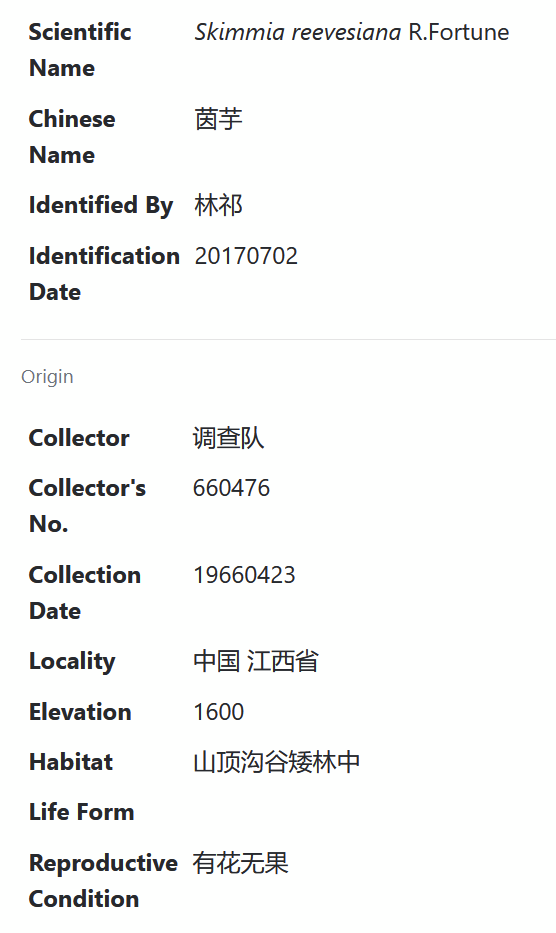

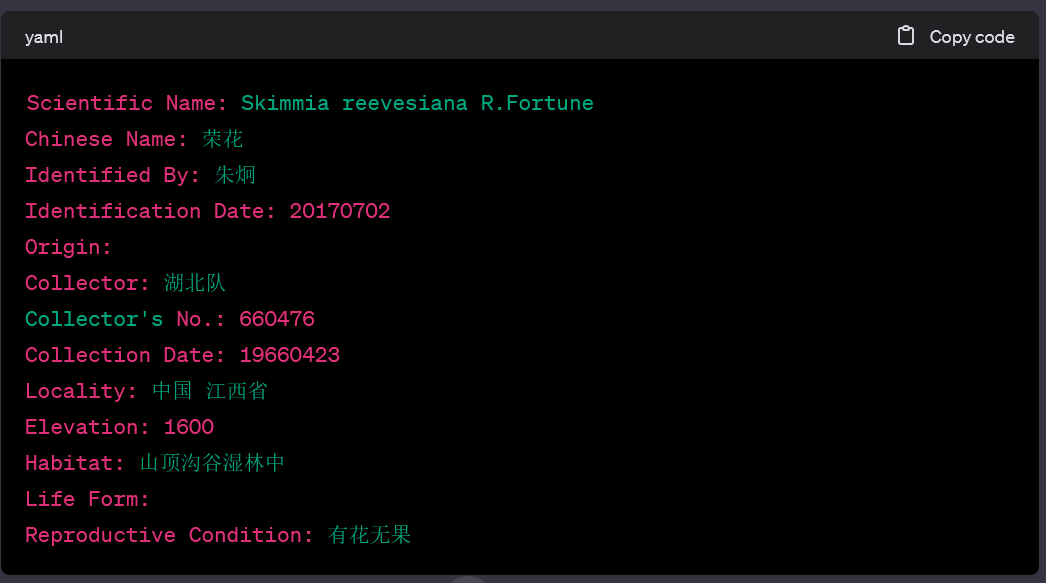